In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [4]:
img = np.asarray(Image.open('1234.jpg'))

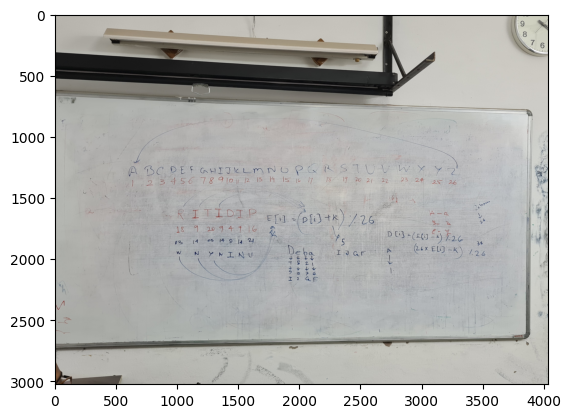

In [5]:
plt.imshow(img, cmap='gray')

In [6]:
img

array([[[186, 183, 176],
        [186, 183, 176],
        [186, 183, 176],
        ...,
        [204, 205, 189],
        [203, 204, 188],
        [203, 204, 188]],

       [[186, 183, 176],
        [186, 183, 176],
        [186, 183, 176],
        ...,
        [202, 203, 187],
        [202, 203, 187],
        [203, 204, 188]],

       [[186, 183, 176],
        [186, 183, 176],
        [186, 183, 176],
        ...,
        [202, 203, 187],
        [201, 202, 186],
        [202, 203, 187]],

       ...,

       [[ 67,  46,  29],
        [ 62,  43,  26],
        [ 55,  37,  23],
        ...,
        [177, 178, 173],
        [176, 177, 172],
        [177, 178, 173]],

       [[ 60,  41,  24],
        [ 58,  39,  22],
        [ 51,  33,  19],
        ...,
        [179, 180, 175],
        [176, 177, 172],
        [175, 176, 171]],

       [[ 59,  40,  23],
        [ 58,  39,  22],
        [ 51,  33,  19],
        ...,
        [179, 180, 175],
        [176, 177, 172],
        [177, 178, 173]]

In [8]:
W,H,C = img.shape

In [ ]:
W,H,C

(1329, 1329)

In [ ]:
message = input()
message += '[END]'
message = message.encode('ascii')
message_bits = ''.join([format(i,'08b') for i in message])

madhu


In [ ]:
message

b'madhu[END]'

In [ ]:
message_bits

'01101101011000010110010001101000011101010101101101000101010011100100010001011101'

In [ ]:
img = img.flatten()
for idx, bit in enumerate(message_bits):
    val = img[idx]
    val = bin(val)
    val = val[:-1] + bit
    img[idx] = int(val,2)
encoded_img = img.reshape((W,H))

In [ ]:
encoded_img

array([[138, 139, 139, ..., 138, 138, 138],
       [138, 138, 138, ..., 138, 138, 138],
       [138, 138, 138, ..., 138, 138, 138],
       ...,
       [232, 232, 232, ..., 232, 232, 232],
       [232, 232, 232, ..., 232, 232, 232],
       [232, 232, 232, ..., 232, 232, 232]], dtype=uint8)

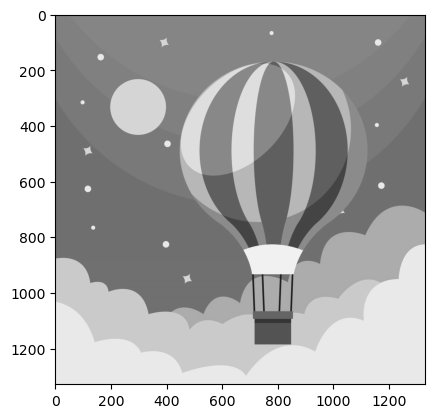

In [ ]:
form_img = Image.fromarray(encoded_img)
plt.imshow(form_img, cmap='gray')
form_img.save("data/1234-modified.jpg")

In [ ]:
decode_img = encoded_img.flatten()

In [ ]:
decode_img

array([138, 139, 139, ..., 232, 232, 232], dtype=uint8)

In [ ]:
msg = ""
idx = 0
while msg[-5:] != '[END]':
    bits = [bin(i)[-1] for i in img[idx:idx+8]]
    bits = ''.join(bits)
    msg += chr(int(bits,2))
    idx+=8
    if idx > img.shape[0]:
        print("No hidden message")
        break

In [ ]:
msg

'madhu[END]'